<a href="https://colab.research.google.com/github/GabrielRamirezs/Metodos1_KarenQuevedo_GabrielRamirez/blob/main/Parcial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#2
import numpy as np

P = np.array([[0.10, 0.90, 0.00],
              [0.05, 0.05, 0.90],
              [0.00, 0.00, 1.00]])

A = np.eye(3) - P.T
A[-1, :] = 1
b = np.zeros(3)
b[-1] = 1
pi = np.linalg.solve(A, b)
print("Estado estable:", pi)

print(f"Interpretación del estado estable:")
print(f"Aproximadamente el {pi[0]*100:.1f}% de los productos están en la estación de producción.")
print(f"Aproximadamente el {pi[1]*100:.1f}% de los productos están en la estación de empaque.")
print(f"Aproximadamente el {pi[2]*100:.1f}% de los productos han sido enviados al mercado.")

P_both_occupied = pi[0] + pi[1]
print(f"Probabilidad de que ambas estaciones estén ocupadas: {P_both_occupied:.3f}")
P_at_least_one_occupied = pi[0] + pi[1]
print(f"Probabilidad de que al menos una estación esté ocupada: {P_at_least_one_occupied:.3f}")
P_production_empty = 1 - pi[0]
print(f"Probabilidad de que la estación de producción esté vacía: {P_production_empty:.3f}")



Estado estable: [0. 0. 1.]
Interpretación del estado estable:
Aproximadamente el 0.0% de los productos están en la estación de producción.
Aproximadamente el 0.0% de los productos están en la estación de empaque.
Aproximadamente el 100.0% de los productos han sido enviados al mercado.
Probabilidad de que ambas estaciones estén ocupadas: 0.000
Probabilidad de que al menos una estación esté ocupada: 0.000
Probabilidad de que la estación de producción esté vacía: 1.000


In [ ]:
#3

P_prime = np.array([[0.10, 0.90, 0.00],
                    [0.05, 0.03, 0.92],
                    [0.02, 0.00, 0.98]])

A_prime = np.eye(3) - P_prime.T
A_prime[-1, :] = 1
b_prime = np.zeros(3)
b_prime[-1] = 1

pi_prime = np.linalg.solve(A_prime, b_prime)
print("Nuevo estado estable:", pi_prime)

print(f"Interpretación del nuevo estado estable:")
print(f"Aproximadamente el {pi_prime[0]*100:.2f}% de los productos están en la estación de producción.")
print(f"Aproximadamente el {pi_prime[1]*100:.2f}% de los productos están en la estación de empaque.")
print(f"Aproximadamente el {pi_prime[2]*100:.2f}% de los productos han sido enviados al mercado.")

P_both_occupied_prime = pi_prime[0] + pi_prime[1]
print(f"Probabilidad de que ambas estaciones estén ocupadas: {P_both_occupied_prime:.4f}")

P_at_least_one_occupied_prime = pi_prime[0] + pi_prime[1]
print(f"Probabilidad de que al menos una estación esté ocupada: {P_at_least_one_occupied_prime:.4f}")

P_production_empty_prime = 1 - pi_prime[0]
print(f"Probabilidad de que la estación de producción esté vacía: {P_production_empty_prime:.4f}")


Nuevo estado estable: [0.02241738 0.02079963 0.95678299]
Interpretación del nuevo estado estable:
Aproximadamente el 2.24% de los productos están en la estación de producción.
Aproximadamente el 2.08% de los productos están en la estación de empaque.
Aproximadamente el 95.68% de los productos han sido enviados al mercado.
Probabilidad de que ambas estaciones estén ocupadas: 0.0432
Probabilidad de que al menos una estación esté ocupada: 0.0432
Probabilidad de que la estación de producción esté vacía: 0.9776


Probabilidad de la secuencia observable dado J: 0.00390625
Probabilidad de la secuencia observable dado B: 0.0005904900000000002
  Secuencia  Probabilidad  Probabilidad acumulada
0  JJJJJJJJ      0.446864                0.446864
1  JJJJJJJB      0.201089                0.647953
2  JBBBBBBB      0.084438                0.732390
3  JJJJJBBB      0.072392                0.804782
4  BBBBBBBB      0.067550                0.872333
Secuencias con probabilidad acumulada <= 20%:
Empty DataFrame
Columns: [Secuencia, Probabilidad, Probabilidad acumulada]
Index: []


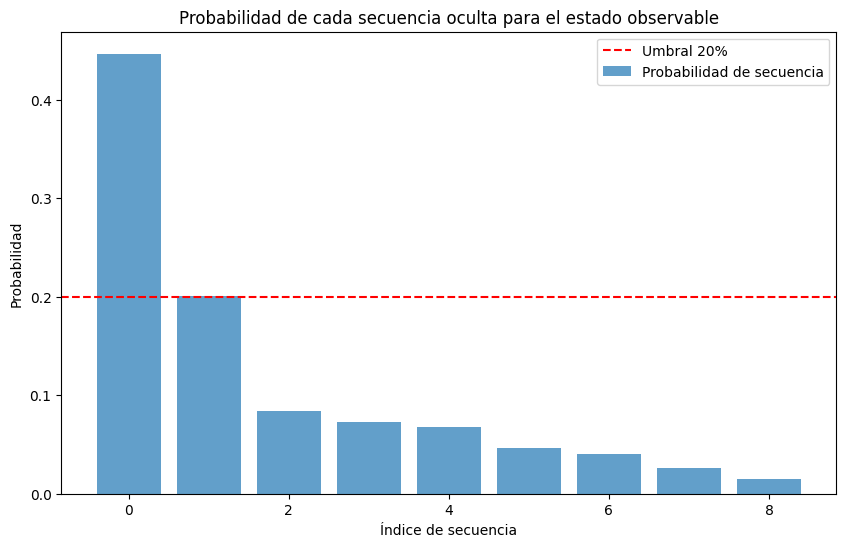

Probabilidad de J dado O: 0.9324496345154466
Probabilidad de B dado O: 0.553136183213879
Verificación del espacio muestral (suma de probabilidades): 1.0

Explicación conceptual:
El resultado depende de la probabilidad a-priori porque esta establece las condiciones iniciales para el modelo de Markov oculto. La probabilidad a-priori determina la distribución inicial sobre los estados ocultos, lo que influye en las probabilidades calculadas para las secuencias y estados observables.

Matrices estimadas:
Matriz de transición estimada:
[[0.51394422 0.48605578]
 [0.49094567 0.50905433]]
Matriz de emisión estimada:
[[0.48707753 0.51292247]
 [0.90342052 0.09657948]]


In [ ]:
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


T = np.array([[0.8, 0.2],
              [0.2, 0.8]])

E = np.array([[0.5, 0.5],
              [0.9, 0.1]])


O = ['S', 'C', 'C', 'C', 'S', 'C', 'S', 'C']
observables = {'C': 0, 'S': 1}
estados = {'J': 0, 'B': 1}
P_O_given_J = np.prod([E[estados['J'], observables[o]] for o in O])
P_O_given_B = np.prod([E[estados['B'], observables[o]] for o in O])

print("Probabilidad de la secuencia observable dado J:", P_O_given_J)
print("Probabilidad de la secuencia observable dado B:", P_O_given_B)

sequences = ['J' * i + 'B' * (len(O) - i) for i in range(len(O) + 1)]
probabilities = []

for seq in sequences:
    prob = 1.0
    for i, estado in enumerate(seq):
        estado_idx = estados[estado]
        if i == 0:
            prob *= 0.5
        else:
            prev_estado_idx = estados[seq[i - 1]]
            prob *= T[prev_estado_idx, estado_idx]
        prob *= E[estado_idx, observables[O[i]]]
    probabilities.append(prob)

data = pd.DataFrame({'Secuencia': sequences, 'Probabilidad': probabilities})
data['Probabilidad'] /= data['Probabilidad'].sum()  # Normalizar
data = data.sort_values(by='Probabilidad', ascending=False).reset_index(drop=True)
data['Probabilidad acumulada'] = data['Probabilidad'].cumsum()
print(data.head())
data_filtered = data[data['Probabilidad acumulada'] <= 0.2]
print("Secuencias con probabilidad acumulada <= 20%:")
print(data_filtered)


plt.figure(figsize=(10, 6))
plt.bar(data.index, data['Probabilidad'], alpha=0.7, label='Probabilidad de secuencia')
plt.xlabel('Índice de secuencia')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de cada secuencia oculta para el estado observable')
plt.axhline(y=0.2, color='r', linestyle='--', label='Umbral 20%')
plt.legend()
plt.show()


P_J = sum(data['Probabilidad'][data['Secuencia'].str.contains('J')])
P_B = sum(data['Probabilidad'][data['Secuencia'].str.contains('B')])

print("Probabilidad de J dado O:", P_J)
print("Probabilidad de B dado O:", P_B)


probabilidad_total = data['Probabilidad'].sum()
print("Verificación del espacio muestral (suma de probabilidades):", probabilidad_total)


print("\nExplicación conceptual:")
print("El resultado depende de la probabilidad a-priori porque esta establece las condiciones iniciales para el modelo de Markov oculto. La probabilidad a-priori determina la distribución inicial sobre los estados ocultos, lo que influye en las probabilidades calculadas para las secuencias y estados observables.")


np.random.seed(42)
estados_sinteticos = np.random.choice(['J', 'B'], size=1000, p=[0.5, 0.5])
observables_sinteticos = []

for estado in estados_sinteticos:
    if estado == 'J':
        observables_sinteticos.append(np.random.choice(['C', 'S'], p=E[estados['J']]))
    else:
        observables_sinteticos.append(np.random.choice(['C', 'S'], p=E[estados['B']]))
transiciones = {('J', 'J'): 0, ('J', 'B'): 0, ('B', 'J'): 0, ('B', 'B'): 0}
for i in range(len(estados_sinteticos) - 1):
    transiciones[(estados_sinteticos[i], estados_sinteticos[i + 1])] += 1

T_estimada = np.array([
    [transiciones[('J', 'J')], transiciones[('J', 'B')]],
    [transiciones[('B', 'J')], transiciones[('B', 'B')]]
], dtype=float)
T_estimada /= T_estimada.sum(axis=1, keepdims=True)
emisiones = {('J', 'C'): 0, ('J', 'S'): 0, ('B', 'C'): 0, ('B', 'S'): 0}
for estado, observable in zip(estados_sinteticos, observables_sinteticos):
    emisiones[(estado, observable)] += 1

E_estimada = np.array([
    [emisiones[('J', 'C')], emisiones[('J', 'S')]],
    [emisiones[('B', 'C')], emisiones[('B', 'S')]]
], dtype=float)
E_estimada /= E_estimada.sum(axis=1, keepdims=True)

print("\nMatrices estimadas:")
print("Matriz de transición estimada:")
print(T_estimada)
print("Matriz de emisión estimada:")
print(E_estimada)



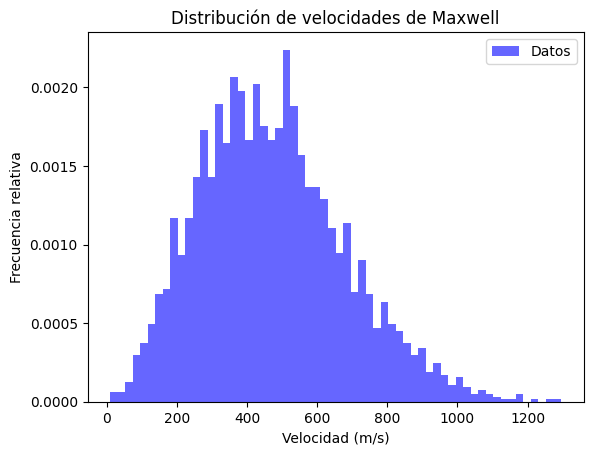

Velocidad promedio empírica: 472.15 m/s
Temperatura ajustada: 295.91 K
Velocidad más probable: 419.11 m/s
Velocidad promedio (teórica): 472.91 m/s


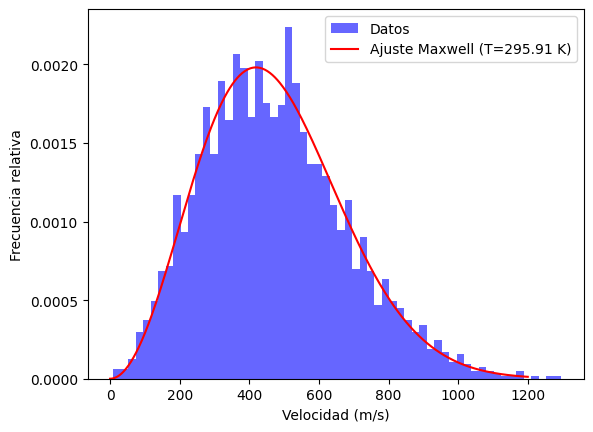

Velocidad cuadrática media: 513.30 m/s


In [ ]:
#9
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Maxwell.csv"
data = pd.read_csv(url, header=None)
velocities = pd.to_numeric(data[0], errors='coerce').dropna().values

bins = 60
freq, edges = np.histogram(velocities, bins=bins, density=True)
bin_centers = (edges[:-1] + edges[1:]) / 2

plt.hist(velocities, bins=bins, density=True, alpha=0.6, color='blue', label='Datos')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Frecuencia relativa')
plt.title('Distribución de velocidades de Maxwell')
plt.legend()
plt.show()

velocity_mean_empirical = np.sum(bin_centers * freq * np.diff(edges))
print(f"Velocidad promedio empírica: {velocity_mean_empirical:.2f} m/s")

def maxwell_distribution(v, T):
    m = 0.028 / 6.022e23
    k_B = 1.38e-23
    return 4 * np.pi * (m / (2 * np.pi * k_B * T))**1.5 * v**2 * np.exp(-m * v**2 / (2 * k_B * T))

T_initial = 300
popt, _ = curve_fit(lambda v, T: maxwell_distribution(v, T), bin_centers, freq, p0=[T_initial])
T_best_fit = popt[0]
print(f"Temperatura ajustada: {T_best_fit:.2f} K")

v_probable = np.sqrt(2 * 1.38e-23 * T_best_fit / (0.028 / 6.022e23))
print(f"Velocidad más probable: {v_probable:.2f} m/s")

v_avg = np.sqrt(8 * 1.38e-23 * T_best_fit / (np.pi * (0.028 / 6.022e23)))
print(f"Velocidad promedio (teórica): {v_avg:.2f} m/s")

v_model = np.linspace(0, 1200, 500)
pdf_model = maxwell_distribution(v_model, T_best_fit)

plt.hist(velocities, bins=bins, density=True, alpha=0.6, color='blue', label='Datos')
plt.plot(v_model, pdf_model, 'r-', label=f'Ajuste Maxwell (T={T_best_fit:.2f} K)')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Frecuencia relativa')
plt.legend()
plt.show()

v_rms = np.sqrt(3 * 1.38e-23 * T_best_fit / (0.028 / 6.022e23))
print(f"Velocidad cuadrática media: {v_rms:.2f} m/s")

In [ ]:
!pip install emcee
!pip install corner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.8 MB/s eta 0:00:00


In [ ]:
#10 primera parte
%pylab inline
from scipy.optimize import minimize
import pandas as pd
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/HiggsFitting.csv'
Data = np.array(pd.read_csv(url)['Higgs'])
y, bin_edges = np.histogram(Data, bins = 30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(bin_centers,y,yerr = 0.5*y**0.5, fmt = 'none', ecolor='k', capsize = 5)
plt.show()
def nul_hip(alpha,x):
    return 1/alpha*e**(-(x-100)/alpha)
def min1(alpha,x):
    return -sum(log(nul_hip(alpha,x)))
res = minimize(min1, [12], args = Data, bounds = ((0,50),))
res
alpha = res['x']
alpha
plt.errorbar(bin_centers,y/sum(y),yerr = 0.5*y**0.5/sum(y), fmt = 'none', ecolor='k', capsize = 5)
scatter(bin_centers,nul_hip(alpha,bin_centers))
def alt_hip(P,x):
    A,mu,sigma,alpha = P
    return (A/((2*pi*sigma**2)**0.5)*e**(-(x-mu)**2/(2*sigma**2))+(1-A)*e**(-(x-100)/alpha)/alpha)
def min2(P,x):
    return (-sum(log(alt_hip(P,x))))
res = minimize(min2, [0.1,125,1.5,17], args = Data, bounds = ((0,1),(50,500),(1,100),(1,100)))
res
P = res['x']
P
plt.errorbar(bin_centers,y/sum(y),yerr = 0.5*y**0.5/sum(y), fmt = 'none', ecolor='k', capsize = 5)
scatter(bin_centers,nul_hip(alpha,bin_centers), c= 'r')
scatter(bin_centers,alt_hip(P,bin_centers),c = 'b')
sigma = (-2*log(min2(P,Data)/min1(alpha,Data)))**0.5
sigma

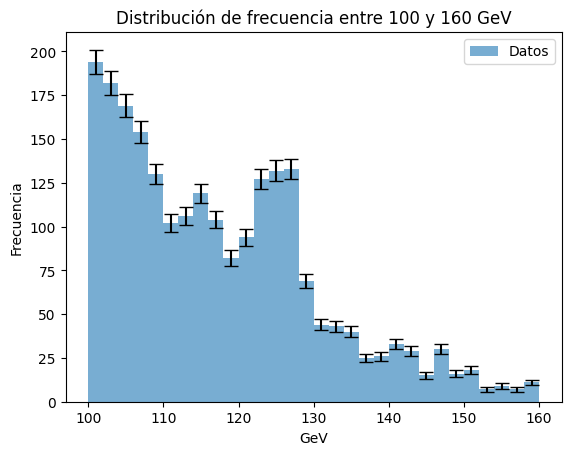

Valor óptimo de α para la hipótesis nula: 17.618756975456076
Valor óptimo de A: 0.14210638805201548
Valor óptimo de µ: 125.19832001984688
Valor óptimo de σ: 2.7752281252666147
Valor óptimo de α para la hipótesis alternativa: 16.363448070353293


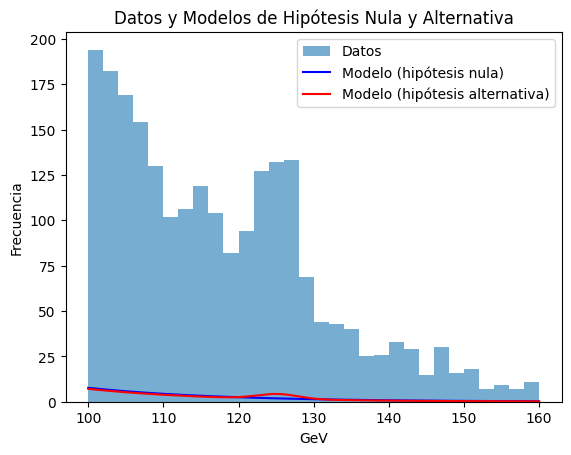

Número de desviaciones estándar (nσ): 15.207078585321765
Tiempo de vida de la partícula (τ): 2.282737892247969e-14 s


100%|██████████| 1000/1000 [12:37<00:00,  1.32it/s]


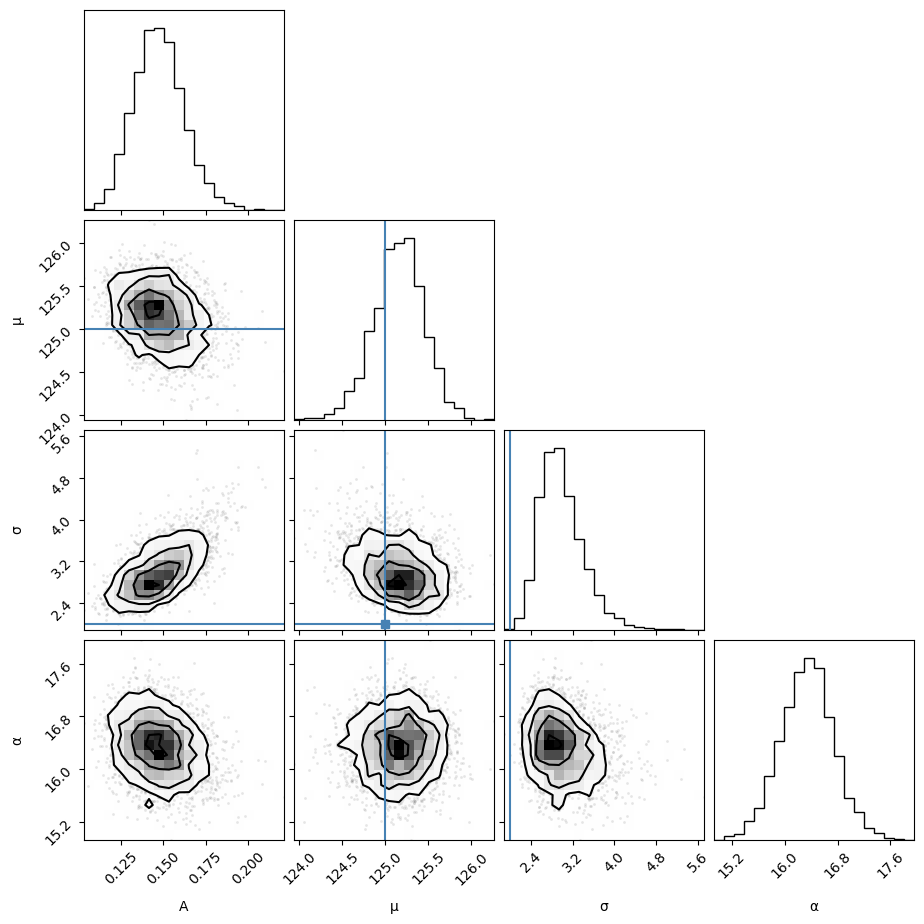

In [ ]:
#10

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import emcee
import corner

url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/HiggsFitting.csv"
data = pd.read_csv(url, header=None)


data[0] = pd.to_numeric(data[0], errors='coerce')
data = data.dropna()


filtered_data = data[(data[0] >= 100) & (data[0] <= 160)][0].values


n, bins, patches = plt.hist(filtered_data, bins=30, range=(100, 160), alpha=0.6, label='Datos')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
error = 0.5 * np.sqrt(n)
plt.errorbar(bin_centers, n, yerr=error, fmt='none', ecolor='k', capsize=5)
plt.xlabel('GeV')
plt.ylabel('Frecuencia')
plt.title('Distribución de frecuencia entre 100 y 160 GeV')
plt.legend()
plt.show()


def hipotesis_nula(x, α):
    return (1/α) * np.exp((-x + 100)/α)

def hipotesis_alternativa(A, mu, sigma, alpha, x):
    signal = A * (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(- (x - mu)**2 / (2 * sigma**2))
    background = (1 - A) * (1 / alpha) * np.exp(- (x - 100) / alpha)
    return signal + background

def negative_log_likelihood_nula(α, x):
    log_likelihood = 0
    for xi in x:
        p = hipotesis_nula(xi, α)
        if p > 0:
            log_likelihood += -1 * np.log(p)
        else:
            log_likelihood += 1e6
    return log_likelihood

bounds_nula = [(1, 100)]
x0_nula = [50]

resultado_nula = minimize(negative_log_likelihood_nula, x0_nula, args=(filtered_data,), bounds=bounds_nula)
alpha_optimo = resultado_nula.x[0]
print(f"Valor óptimo de α para la hipótesis nula: {alpha_optimo}")

def negative_log_likelihood_alternativa(params, x):
    A, mu, sigma, alpha = params
    log_likelihood = 0
    for xi in x:
        p = hipotesis_alternativa(A, mu, sigma, alpha, xi)
        if p > 0:
            log_likelihood += -1 * np.log(p)
        else:
            log_likelihood += 1e6
    return log_likelihood

bounds_alternativa = [(0, 1), (50, 500), (1, 100), (1, 100)]
x0_alternativa = [0.5, 125, 2, 10]

resultado_alternativa = minimize(negative_log_likelihood_alternativa, x0_alternativa, args=(filtered_data,), bounds=bounds_alternativa)

A_optimo, mu_optimo, sigma_optimo, alpha_alt_optimo = resultado_alternativa.x
print(f"Valor óptimo de A: {A_optimo}")
print(f"Valor óptimo de µ: {mu_optimo}")
print(f"Valor óptimo de σ: {sigma_optimo}")
print(f"Valor óptimo de α para la hipótesis alternativa: {alpha_alt_optimo}")

plt.hist(filtered_data, bins=30, range=(100, 160), alpha=0.6, label='Datos')
x_values = np.linspace(100, 160, 1000)

y_values_nula = len(filtered_data) * (x_values[1] - x_values[0]) * hipotesis_nula(x_values, alpha_optimo)
plt.plot(x_values, y_values_nula, label='Modelo (hipótesis nula)', color='blue')

y_values_alternativa = len(filtered_data) * (x_values[1] - x_values[0]) * hipotesis_alternativa(A_optimo, mu_optimo, sigma_optimo, alpha_alt_optimo, x_values)
plt.plot(x_values, y_values_alternativa, label='Modelo (hipótesis alternativa)', color='red')

plt.xlabel('GeV')
plt.ylabel('Frecuencia')
plt.title('Datos y Modelos de Hipótesis Nula y Alternativa')
plt.legend()
plt.show()

log_likelihood_nula = negative_log_likelihood_nula(alpha_optimo, filtered_data)
log_likelihood_alternativa = negative_log_likelihood_alternativa([A_optimo, mu_optimo, sigma_optimo, alpha_alt_optimo], filtered_data)
n_sigma = np.sqrt(-2 * (log_likelihood_alternativa - log_likelihood_nula))
print(f"Número de desviaciones estándar (nσ): {n_sigma}")

hbar = 1.015e-23
sigma_joules = sigma_optimo * 1.60218e-10
tau = hbar / sigma_joules
print(f"Tiempo de vida de la partícula (τ): {tau} s")

def LogPrior(p):
    A, mu, sigma, alpha = p
    if 0 < A < 1 and 100 <= mu <= 300 and 0.1 <= sigma <= 20 and 1 <= alpha <= 50:
        return 0
    else:
        return -np.inf

def LogLikelihood(p, x):
    A, mu, sigma, alpha = p
    log_likelihood = 0
    for xi in x:
        p = hipotesis_alternativa(A, mu, sigma, alpha, xi)
        if p > 0:
            log_likelihood += np.log(p)
    return log_likelihood

def LogPosterior(p, x):
    lp = LogPrior(p)
    if not np.isfinite(lp):
        return -np.inf
    return lp + LogLikelihood(p, x)

ndim = 4
nwalkers = 50
nsteps = 1000
initial = [0.5, 125, 2, 10]
p0 = initial + 1e-4 * np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, LogPosterior, args=[filtered_data])
sampler.run_mcmc(p0, nsteps, progress=True)

samples = sampler.get_chain(discard=100, thin=15, flat=True)

fig = corner.corner(samples, labels=["A", "μ", "σ", "α"], truths=[0.5, 125, 2, 10])
plt.show()

A_mcmc, mu_mcmc, sigma_mcmc, alpha_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                                                zip(*np.percentile(samples, [16, 50, 84], axis=0)))
print(f"A: {A_mcmc[0]:.3f} (+{A_mcmc[1]:.3f}/-{A_mcmc[2]:.3f})")

A: 0.147 (+0.015/-0.014)


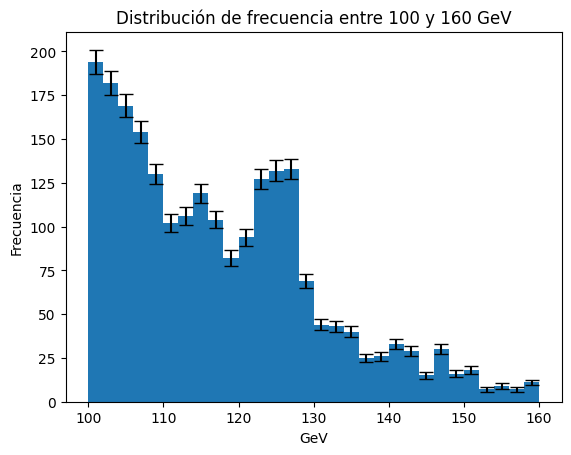

<ipython-input-8-0a98546c271d>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  log_likelihood += -1 * math.log(hipotesis_nula(α, xi))


In [ ]:
#10
import math
from scipy.optimize import minimize

url ="https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/HiggsFitting.csv"
data= pd.read_csv(url, header=None)

data[0] = pd.to_numeric(data[0], errors='coerce')
filtered_data = data[(data[0] >= 100) & (data[0] <= 160)][0].values

n, bins, patches = plt.hist(filtered_data, bins=30, range=(100, 160))

bin_centers = 0.5 * (bins[:-1] + bins[1:])
error = 0.5*np.sqrt(n)
plt.errorbar(bin_centers, n, yerr=error, fmt='none', ecolor='k', capsize=5)

plt.xlabel('GeV')
plt.ylabel('Frecuencia')
plt.title('Distribución de frecuencia entre 100 y 160 GeV')
plt.show()

def hipotesis_nula(x,α):
  return (1/α)*np.exp((-x+100)/α)

def negative_log_likelihood(α, x, hipotesis_nula):
    n = len(x)
    log_likelihood = 0
    for xi in x:
        log_likelihood += -1 * math.log(hipotesis_nula(α, xi))
    return log_likelihood
bounds = ((0, 50),)
x0=1
resultado = minimize(lambda alpha: negative_log_likelihood(alpha, filtered_data, hipotesis_nula), x0, bounds=bounds)

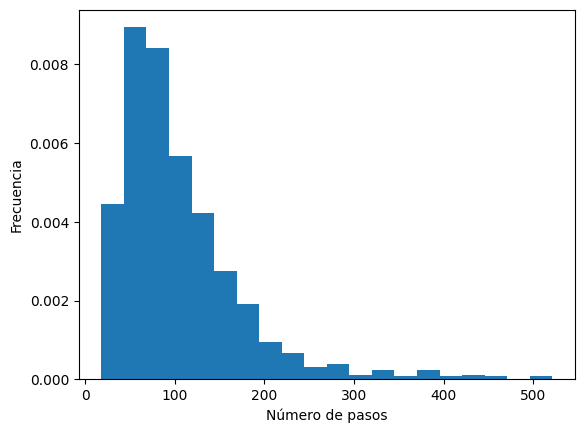

Valor esperado del número de pasos: 105.695
Tiempo de escape estimado (en unidades de tiempo): 3.523166666666666e-05


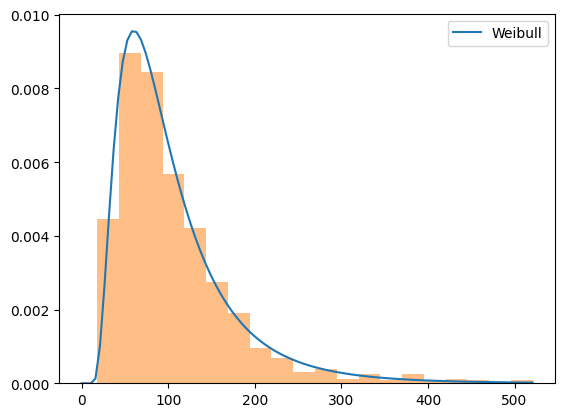

In [25]:
#4
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import exponweib

R_sol = 1
l = 0.1
N = 1000
n_clases = 20
c = 3e5
def caminata_aleatoria(R_sol, l):
    x, y, z = 0, 0, 0
    pasos = 0
    while np.sqrt(x**2 + y**2 + z**2) < R_sol:
        theta = np.random.uniform(0, np.pi)
        phi = np.random.uniform(0, 2*np.pi)
        x += l * np.sin(theta) * np.cos(phi)
        y += l * np.sin(theta) * np.sin(phi)
        z += l * np.cos(theta)
        pasos += 1
    return pasos
pasos_fotones = [caminata_aleatoria(R_sol, l) for _ in range(N)]
plt.hist(pasos_fotones, bins=n_clases, density=True)
plt.xlabel('Número de pasos')
plt.ylabel('Frecuencia')
plt.show()
valor_esperado = np.mean(pasos_fotones)
print("Valor esperado del número de pasos:", valor_esperado)
tiempo_escape = valor_esperado * l / c
print("Tiempo de escape estimado (en unidades de tiempo):", tiempo_escape)
params = exponweib.fit(pasos_fotones)
x = np.linspace(0, max(pasos_fotones), 100)
plt.plot(x, exponweib.pdf(x, *params), label='Weibull')
plt.hist(pasos_fotones, bins=n_clases, density=True, alpha=0.5)
plt.legend()
plt.show()